In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

from copy import copy
from operator import itemgetter
from matplotlib import gridspec
from pathlib import Path

from My_libraries.my_stats import half_frame
# from my_stats import half_frame

# Probabilities of events for discrete random variables


## Single variable processes

Let us consider a process that generates a discrete random variable such as rolling a die. The **sample space** for this process is 

> S = {1, 2, 3, 4, 5, 6}

And each of the possible outcomes is the samples space is **equiprobable**. That is, $P(k) = 1/6$.

All the **axioms of probability** are verified for this case. For example: 

1. $P(k) = 1/6 > 0~~~~~~~~$ for all $k \in S$


2. $\sum_{k = 1}^6 P(k) = 6 \times 1/6 = 1$


3. $P(k \in \{1, 2\}) = P(k=1) + P(k=2)$


And we can also see that corollaries derived from these axioms are also verifiable: 

1. $P(k = 0) = P(k \notin S) = 0$


2. $P(S - \{2\}) = 1 - P(k = 2) = 5/6$


3. $P(k \in \{1, 2 \}) = 2/6 \le P(k \in \{1, 2, 3\}) = 1/2$





## Exercise

Write code that generates samples that are like rolling a single die many times.

Then, write code that will generate a histogram from the sample, determine the mean and standard deviation of those samples and write their values in the plot.

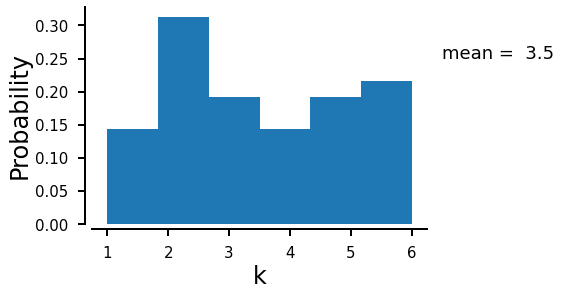

In [28]:
N = 50

# Generate sample from uniform between 1-6
sample = stats.randint.rvs(1, 7, size = N)

# Calculate mean, std dev, and histogram and plot it
mean = np.mean(sample)
st_dev = np.std(sample)

fig = plt.figure( figsize = (6, 4) )
ax = fig.add_subplot(111)

half_frame(ax, 'k', 'Probability', font_size = 15)
plt.hist(sample, 6, density = True)

# Beautify graph
ax.text(6.5, 0.25, f"mean = {mean: .1f}", fontsize = 18)


plt.show()

## Multiple variable processes

Let us consider a generalization of the process described above by considering that we roll several dice at the same time. If we roll 2 dice, then the **sample space** is 

> S = {1, 2, 3, 4, 5, 6} $\times$ {1, 2, 3, 4, 5, 6} = { 11, 12, 13, 14, 15, 16, 21, ..., 65, 66}

And each of the possible outcomes is the samples space is **equiprobable**. That is, $P(kl) = 1/36$.

All the **axioms of probability** are verified for this case. For example: 

1. $P(kl) = 1/36 > 0~~~~~~~$ for all $kl \in S$


2. $\sum_{k = 1}^6 \sum_{l = 1}^6 P(kl) = \sum_{k = 1}^6 6 \times 1/36 = 6 \times 1/6 = 1$


3. $P(kl \in \{11, 22\}) = P(kl =11) + P(kl=22)$


And so on.


## Exercise

Write code that generates samples that are like rolling two dice many times.

Then, write code that will generate a histogram from the sample, determine the mean and standard deviation of those samples and write their values in the plot.

In [30]:
N = 50
sample1 = stats.randint.rvs(1, 7, size = N)
sample2 = stats.randint.rvs(1, 7, size = N)
sample = list(zip(sample1, sample2))
print(sample)

[(3, 1), (5, 4), (3, 5), (2, 2), (6, 2), (1, 1), (4, 1), (1, 2), (6, 4), (5, 4), (4, 2), (5, 2), (5, 6), (1, 2), (6, 5), (3, 6), (6, 1), (2, 5), (5, 2), (4, 5), (4, 2), (4, 2), (2, 5), (5, 5), (5, 1), (4, 6), (1, 6), (5, 3), (1, 5), (6, 4), (5, 1), (1, 2), (3, 4), (6, 2), (4, 6), (2, 5), (6, 4), (4, 6), (4, 5), (4, 3), (3, 1), (2, 4), (3, 4), (2, 1), (6, 4), (2, 2), (5, 2), (6, 1), (2, 2), (3, 5)]


## More 'interesting' events

When a process is multivariable, this gives rise to the opportunity to define more interesting events.  For example, when dealing with rolling of multiple dice, one can ask about the sum of the points of the dice.

Consider for example, the event $ E = $ `sum of points from 2 dice is 5`. What is its probability? In order to answer this, we need to enumerate the set of elementary events (we could also call them micro-states) that give rise to the specific event (we could also call it a macro-state).  That is:

> $E = \{ 14, 23, 32, 41\}$

So, 

> $P(E) = P(\{ 14, 23, 32, 41\}) = 4 \times 1/36 = 1/9$


## Exercises

Can you calculate the probability of `sum of points from 2 dice is even`?

What about the probability that the probability that `one die is a 3 and the sum of points from 2 dice is even`?  

In [39]:
counter = 0
for die_1 in range(1, 7):
    for die_2 in range(1, 7):
        my_sum = die_1 + die_2
        if my_sum % 2 == 0:
            counter += 1
            
print(counter)

18


In [40]:
counter = 0
die_3 = 3
for die_1 in range(1, 7):
    for die_2 in range(1, 7):
        my_sum = die_1 + die_2
        if my_sum % 2 == 0 and (die_1 == 3 or die_2 == 3):
            counter += 1
            
print(counter)

5


# Probabilities of events for continuous random variables


## Single variable processes

Let us consider a process that generates a random variable such as time for a radioactive nucleus to decay. The **sample space** for this process is 

> S = [0, $\infty$] 

The probability density function for this process is not uniform, but instead decays as an exponential:

> $f(t; \lambda) = \lambda e^{- \lambda t}~~~~~~~$ where $\lambda > 0$


All the **axioms of probability** are verified for this case. For example: 

1. $f(t; \lambda) > 0~~~~~~~$ for all $t \ge 0$


2. $\int_{0}^{\infty} ~dt ~f(t; \lambda) = [- e^{- \lambda t}]_{t = 0}^{t = \infty} = -(0-1) = 1$


3. $P(t \in [1, 2]) = \int_{x = 1}^{2} ~dt ~f(t; \lambda)  = [- e^{- \lambda t}]_{t = 1}^{t = 2} = e^{-\lambda} - e^{-2\lambda}$


## Exercise

Write code that generates samples that are observing the decay of a single nucleus many times.

Then, write code that will generate a histogram from the sample, determine the mean and standard deviation of those samples and write their values in the plot.

## Multiple variable processes

Let us consider a generalization of the process described above by considering a process where we are following multiple radioactive nuclei of the same species. If we consider 2  nuclei, then the **sample space** is 

> S = $[0, \infty] \times [0, \infty]$ 

The probability density function for this process is not uniform. If the nuclei can be assumed to decay independently, then the probability density function that nucleus 1 decays at time $t_1$ and nucleus 2 decays at time $t_2$ is

> $f(t_1, t_2; \lambda) = \lambda^2 ~ e^{-\lambda~(t_1 + t_2)}~~~~~$ where $\lambda > 0$

All the **axioms of probability** are verified for this case. For example: 

1. $f(t_1, t_2; \lambda) > 0~~~~~~$ for all $t_1 \ge 0$ and all $t_2 > 0$


2. $\int_{0}^{\infty}~dt_1 ~\int_{0}^{\infty}~dt_2 ~f(t_1, t_2; \lambda) = 1~~~~~~~~$ (Show this)


3. $P((t_1, t_2) \in [1, 2]\times [1, 2]) = \int_{1}^{2} ~dt_1 ~\int_{1}^{2}~dt_2 ~ f(t_1, t_2; \lambda) =  ( e^{-\lambda} - e^{-2\lambda} )^2$


And so on.


## Exercise

Write code that generates samples that are like observing the decays of many nuclei.

Then, write code that will generate a histogram from the sample, determine the mean and standard deviation of those samples and write their values in the plot.

## More 'interesting' events

You have heard of Schroedinger's cat.  The idea is that a cat is in a box, and there is a radioactive nucleus that, it it decays, releases a poison that kills the cat.  To make things more interesting, we will consider a case in which there are two radioactive nuclei in the box, and that both need to decay in order for the poison to be release.  So, we want to determine the probability (density) that the cat dies at time $t$.

As for the discrete examples in Section 1, we need to enumerate the set of elementary events (we could also call them micro-states) that give rise to the specific event (we could also call it a macro-state). Let us assume first that nucleus 1 decays last. What is the set of micro-states given by $(t_1, t_2)$ that contributes to this macro-state (t)?

> $E_1 = \{t_1 = t~~$ and $~~t_2 \in [0, t]\}$

So, 

> $p(E_1) = f(t_1 = t; \lambda) ~\int_0^t ~dt_2 ~f(t_2; \lambda) = \lambda~e^{-\lambda t}~(1- e^{-\lambda t})$

But we need to consider also the possibility that nucleus 2 decays last.  This event, $E_2$, has the same probability as $E_1$, so the final probability is just double $p(E_1)$.

Let's see what this function looks like:  

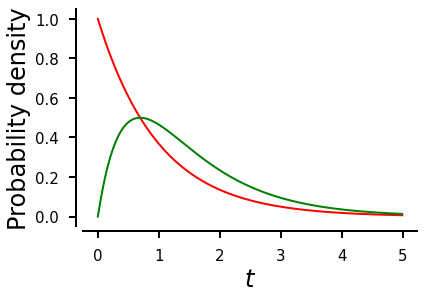

In [10]:
lamb = 1.
t = np.arange(0, 5*lamb, 0.01*lamb)
f_t = lamb * np.exp(-lamb*t)
p_E = 2 * lamb * np.exp(-lamb*t) * (1 - np.exp(-lamb*t))

my_font_size = 15
fig = plt.figure( figsize = (6, 4) )

ax = fig.add_subplot(1,1,1)
half_frame(ax, '$t$', 'Probability density', font_size = my_font_size)

ax.plot(t, f_t, 'r-', lw = 2, label = 'exponential')
ax.plot(t, p_E, 'g-', lw = 2, label = 'exponential')

plt.show()

## Exercises

1. Calculate the probability that the cat stays alive **up to** time $t$ for the case of a single nucleus and for the case of two nuclei.


2. Determine how long you have to wait until you are 95% confident that the cat is death.


3. Consider the case in which there are two nuclei, but now that instead of both having to decay, it is sufficient for one of them to decay in order for the poison to be released.  Calculate the probability (density) that the poison is released at time $t$ and the probability that the poison is not released by time $t$. 


4. Consider the case in which there are $N = 100$ nuclei.  What is the probability (density) that 50 of them decay in the time interval [0, 1]?

# Transformation of random variables

PETA has complained that we have to stop killing Schroedinger's cats.  In order to give the cats a better chance of survival, we do not start with a killing dose of poison in the case, but instead increase the amount of poison linearly from zero at a rate $r$ with time.  When the nucleus decays, we both stop the flow of poison to the case and release the poison in the case. What is the probability that the cat receives a dose $d$ of poison?

The dose of poison increases with time as 

> $\delta = rt~~~~~~~~$ with $r > 0$

and we know that the probability of the decay occurring at time $t$ is 

> $f(t; \lambda) = \lambda ~e^{-\lambda t}$

We can use these two expression to determine $f_p(\delta; r, \lambda)$. The basic idea is that

> $f(t; \lambda)~dt = f_p(\delta; r, \lambda) ~d\delta$

that is

> $f_p(\delta; r, \lambda) = f(t(\delta); \lambda) \frac{dt(\delta)}{d\delta}$

> $f_p(\delta; r, \lambda) = \lambda ~e^{-\lambda \delta / r} ~1/r = \frac{\lambda}{r}~e^{-\lambda \delta / r}$


If $\delta \ge 3$ is a lethal dose, how should $r$ be adjusted to only kill the cat in half of our experiments?